# Most mentioned philosophers
In this notebook we look at the most mentioned philosophers in the corpus.

To do this, we use regular expressions to identify words that start in a capital letter and are preceded by a whitespace (i.e. not at the beginning of a sentence). While a more thorough approach would count words beginning a sentence too, this would entail much more cleaning as many words would not be author names. With the method used here, some cleaning is required but not as much as with the alternative method.

## Loading the corpus

Remember that we have some loader utility functions available which we may call for this purpose.

In [5]:
import os
import re
import sys 

# Jupyter Notebooks are not good at handling relative imports.
# Best solution (not great practice) is to add the project's path
# to the module loading paths of sys.

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.loaders import loadCorpusList, saveCorpus

In [6]:
corpusPath = '../data/clean_json'

corpusList = loadCorpusList(corpusPath)

## Processing the list
The first thing will be to load our stopwords. This is because there will be some stopwords in the text anyway, so we will do some cleaning by eliminating them. We also include English stopwords since some words that will pop up are in English (e.g. 'the').

In [7]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words()

with open('../notebooks/wordlists/stopwords.txt') as fp:
    stopwords_es = fp.read().split('\n') + stopwords_en

After running this a couple of times, we have detected some words that must be added to this temporary stopword list, as they do not constitute philosopher names. 

We should save that list just in case.

In [194]:
new_stopwords = ['abstract',  'academia',  'academy',  'access',  'according',  'acerca',  'action',  'agradezco',  'aires',  'akademie',  'akal',  'alemania',  'alexander',  'alianza',  'ambas',  'american',  'américa',  'analysis',  'ancient',  'andes',  'anthropos',  'antigüedad',  'antropología',  'antítesis',  'approach',  'argentina',  'aristotelian',  'art',  'asimismo',  'atenas',  'autónoma',  'band',  'barcelona',  'barry',  'bello',  'biblia',  'bibliografía',  'biblioteca',  'bien',  'biology',  'blackwell',  'body',  'bogotá',  'book',  'books',  'boston',  'british',  'cabe',  'cali',  'cambridge',  'caracas',  'carlos',  'católica',  'cave',  'centro',  'charles',  'chicago',  'chile',  'china',  'ciencia',  'ciencias',  'ciertamente',  'ciudad',  'clarendon',  'classical',  'cognition',  'cognitive',  'colombia',  'companion',  'company',  'concept',  'concerning',  'conclusiones',  'conclusión',  'confederación',  'congreso',  'consciousness',  'constitución',  'constraint',  'contemporary',  'cristo',  'critical',  'critique',  'crítica',  'cultura',  'curiositate',  'cátedra',  'dada',  'dado',  'dasein',  'debemos',  'deducción',  'democracy',  'development',  'dicha',  'dios',  'discurso',  'diálogos',  'dmp',  'documento',  'dordrecht',  'económica',  'edad',  'ediciones',  'edición',  'editores',  'editorial',  'eds',  'efectivamente',  'emmanuel',  'emotion',  'emotions',  'enrique',  'ensayo',  'ensayos',  'epistemology',  'escritura',  'escuela',  'españa',  'essay',  'essays',  'estudio',  'estudios',  'estética',  'ethica',  'ethics',  'europa',  'existe',  'existen',  'experience',  'facultad',  'fcps',  'fenomenología',  'filosofía',  'finalmente',  'first',  'fondo',  'formas',  'france',  'francia',  'francisco',  'free',  'freedom',  'frente',  'fundamentación',  'física',  'gedisa',  'geschichte',  'gesinnung',  'gracias',  'grecia',  'gredos',  'greek',  'gruyter',  'guerra',  'harvard',  'historia',  'history',  'homo',  'however',  'hrsg',  'human',  'husserliana',  'idea',  'ideas',  'iglesia',  'igualmente',  'iii',  'ilustración',  'immanuel',  'indeed',  'indianapolis',  'inducido',  'infinito',  'inglaterra',  'instituto',  'international',  'interpretation',  'introducción',  'introduction',  'investigaciones',  'investigación',  'john',  'jorge',  'josé',  'journal',  'juan',  'justamente',  'justice',  'justicia',  'karl',  'key',  'knowledge',  'kritik',  'krv',  'language',  'latina',  'latinoamérica',  'law',  'lecciones',  'liberalism',  'liberty',  'library',  'libro',  'liceo',  'life',  'logic',  'london',  'londres',  'luis',  'lógica',  'madrid',  'main',  'main',  'manuel',  'maría',  'media',  'meditaciones',  'meditación',  'menón',  'metafísica',  'metaphysics',  'metaphysics',  'metaphysik',  'method',  'michel',  'miguel',  'mind',  'miserable',  'modern',  'modernidad',  'moreover',  'mundo',  'méxico',  'nacional',  'natural',  'naturaleza',  'naturalmente',  'nature',  'new',  'niega',  'notas',  'nuevamente',  'nótese',  'obras',  'occidente',  'ofrecemos',  'oxford',  'pablo',  'paidós',  'palabras',  'palavras-chave',  'papers',  'paris',  'parís',  'pedro',  'pensar',  'perspectives',  'perú',  'pese',  'phaedo',  'phenomenological',  'phenomenology',  'philosophical',  'philosophie',  'philosophy',  'phänomenologie',  'pie',  'pienso',  'platonic',  'podríamos',  'political',  'politics',  'política',  'pontificia',  'post',  'posteriormente',  'practical',  'precisamente',  'press',  'presses',  'princeton',  'principios',  'principles',  'problem',  'proceedings',  'psychology',  'public',  'publishers',  'publishing',  'puesto',  'quarterly',  'quisiera',  'razón',  'rcp',  'real',  'realism',  'reason',  'reasons',  'recordemos',  'religion',  'religión',  'renacimiento',  'republic',  'república',  'república',  'research',  'responsibility',  'resulta',  'resumen',  'reuters',  'review',  'revista',  'revolución',  'right',  'rights',  'roma',  'routledge',  'río',  'san',  'santiago',  'sbn',  'schriften',  'scielo',  'science',  'sciences',  'scientific',  'see',  'self',  'ser',  'siglo',  'siguiendo',  'sinn-gebung',  'social',  'society',  'socratic',  'sospecha',  'stanford',  'state',  'studies',  'study',  'suhrkamp',  'supongamos',  'taurus',  'tecnos',  'teoría',  'tesis',  'theory',  'thomas',  'thought',  'thus',  'tierra',  'time',  'tlp',  'tms',  'toleration',  'tomás',  'totalidad',  'tractatus',  'trad',  'trads',  'traducción',  'tratado',  'trotta',  'truth',  'two',  'understanding',  'unidos',  'universidad',  'universitaires',  'university',  'validación',  'valle',  'valores',  'veamos',  'verdad',  'verlag',  'vernunft',  'vii',  'viii',  'virtue',  'vol',  'véase',  'wahrheit',  'web',  'wissenschaften',  'world',  'xiii',  'xiv',  'xix',  'xvi',  'xvii',  'xviii',  'xxi',  'york',  'zeit']

In [195]:
stopwords_es = list(set(stopwords_es + new_stopwords))

In [196]:
sorted(new_stopwords)

['abstract',
 'academia',
 'academy',
 'access',
 'according',
 'acerca',
 'action',
 'agradezco',
 'aires',
 'akademie',
 'akal',
 'alemania',
 'alexander',
 'alianza',
 'ambas',
 'american',
 'américa',
 'analysis',
 'ancient',
 'andes',
 'anthropos',
 'antigüedad',
 'antropología',
 'antítesis',
 'approach',
 'argentina',
 'aristotelian',
 'art',
 'asimismo',
 'atenas',
 'autónoma',
 'band',
 'barcelona',
 'barry',
 'bello',
 'biblia',
 'bibliografía',
 'biblioteca',
 'bien',
 'biology',
 'blackwell',
 'body',
 'bogotá',
 'book',
 'books',
 'boston',
 'british',
 'cabe',
 'cali',
 'cambridge',
 'caracas',
 'carlos',
 'católica',
 'cave',
 'centro',
 'charles',
 'chicago',
 'chile',
 'china',
 'ciencia',
 'ciencias',
 'ciertamente',
 'ciudad',
 'clarendon',
 'classical',
 'cognition',
 'cognitive',
 'colombia',
 'companion',
 'company',
 'concept',
 'concerning',
 'conclusiones',
 'conclusión',
 'confederación',
 'congreso',
 'consciousness',
 'constitución',
 'constraint',
 'contemp

In [197]:
with open('authors_stopwords.txt', 'w') as fp:
    fp.write('\n'.join(new_stopwords))

Once we have our stopwords, we can run the regular expression on all documents and make a list of names. We will replace some of these names for their Spanish versions if needed or correct some minor bugs that may occur (e.g. 'Ortega y Gasset' is one name only).

In [160]:
nameCorrections = {
    'Aristotle': 'Aristóteles',
    'Plato': 'Platón',
    'Ortega': 'Ortega y Gasset',
    'Gasset': '', # We eliminate Gasset since we are already counting 'Ortega', so we must avoid duplicates.
    'Socrates': 'Sócrates',
    'Sóc': 'Sócrates',
    'Kants': 'Kant',
    'Kiekegaard': 'Kierkegaard'
}

In [198]:
names = []
for doc in corpusList:
    names += [re.sub(' ', '', word) for word in re.findall(' [A-Z]\w+-*\w*', doc.cleanText)]
    
names = [word for word in names  if word.lower() not in stopwords_es and len(word) > 2]

names = [nameCorrections[word] if word in nameCorrections.keys() else word for word in names]

In [199]:
from collections import Counter
namesCount = Counter(names)

Who are the top 50 most frequent philosophers in the corpus?

In [200]:
for author in enumerate(namesCount.most_common(50)):
    print(f"{author[0]+1}: {author[1]}")

1: ('Kant', 3314)
2: ('Aristóteles', 1729)
3: ('Heidegger', 1516)
4: ('Hegel', 1401)
5: ('Sócrates', 1361)
6: ('Platón', 1079)
7: ('Nietzsche', 1021)
8: ('Rawls', 777)
9: ('Husserl', 763)
10: ('Foucault', 743)
11: ('Wittgenstein', 739)
12: ('Habermas', 523)
13: ('Smith', 516)
14: ('Descartes', 504)
15: ('Spinoza', 491)
16: ('Marx', 459)
17: ('Gadamer', 456)
18: ('Lévinas', 391)
19: ('Frankfurt', 387)
20: ('Benjamin', 378)
21: ('Deleuze', 373)
22: ('Locke', 367)
23: ('Merleau-Ponty', 364)
24: ('Vattimo', 353)
25: ('Hume', 351)
26: ('Agamben', 308)
27: ('Arendt', 306)
28: ('Davidson', 302)
29: ('Hobbes', 301)
30: ('Taylor', 289)
31: ('Derrida', 281)
32: ('Schelling', 280)
33: ('James', 264)
34: ('Sartre', 258)
35: ('Leibniz', 246)
36: ('Gómez', 244)
37: ('Feyerabend', 241)
38: ('Rorty', 236)
39: ('Nussbaum', 229)
40: ('Ricoeur', 219)
41: ('Bataille', 219)
42: ('García', 215)
43: ('Ortega y Gasset', 214)
44: ('Fichte', 209)
45: ('Frith', 209)
46: ('Quine', 205)
47: ('Peirce', 204)
48: ('A

Let's get a word cloud! 

In [66]:
from wordcloud import WordCloud

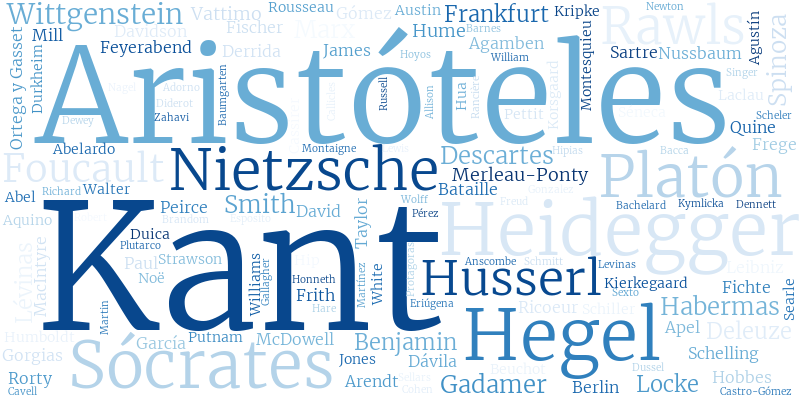

In [223]:
WordCloud(background_color='white',
          font_path = '/home/juanrloaiza/.fonts/Merriweather-300.ttf',
         scale = 2,
         stopwords = stopwords_es,
         max_words=200,
         colormap='Blues').generate_from_frequencies(namesCount).to_image()